In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, train_test_split
import numpy as np

In [2]:
data = pd.read_csv("kickstarter_data.csv")
data['success_rate'] = data['pled'] / data['goal']

In [3]:
df_1 = data[['text_am', 'success_rate']]

In [4]:
train_X, test_X, train_y, test_y = train_test_split(df_1['text_am'], df_1['success_rate'], train_size=0.8)

In [5]:
scaler = StandardScaler()

train_data = scaler.fit_transform(train_X.to_numpy().reshape(-1, 1))

model = LinearRegression()

model.fit(train_data, train_y)
model.predict(train_data)

array([ 3.35995207e+01, -1.97137811e-02,  1.45661312e+01, ...,
        3.69241003e+00, -1.06307847e+01,  2.35487704e+01])

In [6]:
def test_mse(model, X, y):
    preds = model.predict(X)
    mse = mean_squared_error(y, preds)
    
    return mse

In [7]:
# Testing raw linear regression /w normalization
test_mse(model, train_data, train_y)

test_x_data = scaler.transform(test_X.to_numpy().reshape(-1, 1))
test_y_data = test_y.to_numpy().reshape(-1, 1)

test_mse(model, train_data, train_y), test_mse(model, test_x_data, test_y_data), model.coef_

(261887.3858237828, 7271.91837614848, array([16.0274553]))

In [8]:
# Testing regression /w L1 regularization
lasso = Lasso()
lasso.fit(train_data, train_y)

test_mse(lasso, train_data, train_y), test_mse(lasso, test_x_data, test_y_data), model.coef_

(261888.38582378265, 7242.050280918858, array([16.0274553]))

In [9]:
# Testing regression /w L2 regularization
ridge = Ridge()
ridge.fit(train_data, train_y)

test_mse(ridge, train_data, train_y), test_mse(ridge, test_x_data, test_y_data), model.coef_

(261887.38582944247, 7271.844940103512, array([16.0274553]))

In [10]:
def test_models(train_x, train_y, test_x, test_y):
    scaler = StandardScaler()
    
    train_data = scaler.fit_transform(train_x.to_numpy().reshape(-1, 1))
    train_y = train_y.to_numpy().reshape(-1, 1)
    
    test_x = scaler.transform(test_x.to_numpy().reshape(-1, 1))
    test_y = test_y.to_numpy().reshape(-1, 1)
    
    model = LinearRegression()
    model.fit(train_data, train_y)
    linear_preds = model.predict(test_x)
    
    lasso = Lasso()
    lasso.fit(train_data, train_y)
    lasso_preds = lasso.predict(test_x)
    
    ridge = Ridge()
    ridge.fit(train_data, train_y)
    ridge_preds = ridge.predict(test_x)
    
    return mean_squared_error(linear_preds, test_y), mean_squared_error(lasso_preds, test_y), mean_squared_error(ridge_preds, test_y)
    

In [11]:
train_X, test_X, train_y, test_y = train_test_split(df_1['text_am'], df_1['success_rate'], train_size=0.8)

preds_by_pow = {}

for pow_ in np.linspace(0.1, 3, 15):
    preds_by_pow[f'^{pow_}'] = test_models(train_X ** pow_, train_y, test_X ** pow_, test_y)

In [12]:
preds = [(k, v) for k, v in preds_by_pow.items()]
preds.sort(key=lambda x: x[1][0])
preds

[('^0.1', (383.7229118510016, 359.6466940103476, 383.6806460643908)),
 ('^0.30714285714285716',
  (415.6379292559382, 389.83429716590575, 415.5866267191288)),
 ('^0.5142857142857142',
  (451.0614465287949, 422.663261910737, 450.99989145079286)),
 ('^0.7214285714285714',
  (486.46650896594133, 455.5422830882861, 486.3946512398726)),
 ('^0.9285714285714285',
  (520.3954862171604, 487.11696057454475, 520.3137224641782)),
 ('^1.1357142857142857',
  (551.6733191864992, 516.2500535497537, 551.5824000985206)),
 ('^1.342857142857143',
  (579.4183934743298, 542.0726938692228, 579.3193360608053)),
 ('^1.55', (603.0792128233926, 564.0292734043358, 602.9732028934943)),
 ('^1.7571428571428571',
  (622.4213911123605, 581.8691845795621, 622.3096893331699)),
 ('^1.9642857142857142',
  (637.4766281310632, 595.5999779101982, 637.360490736707)),
 ('^2.1714285714285713',
  (648.4738996231368, 605.4222271171177, 648.3545191833879)),
 ('^2.3785714285714286',
  (655.7691163505268, 611.6621850672618, 655.6475

In [13]:
import matplotlib.pyplot as plt

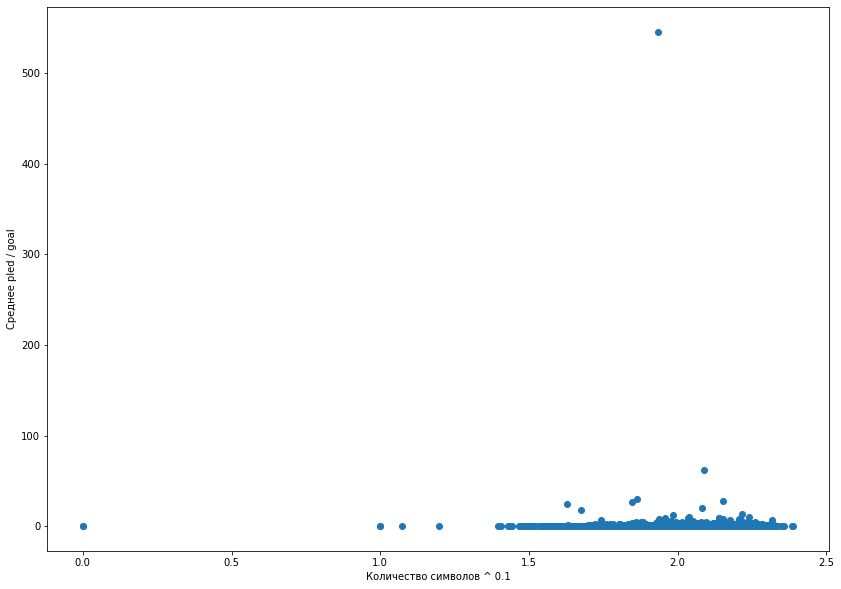

In [14]:
plt.figure(figsize=(14,10))
plt.scatter(test_X ** 0.1, test_y)

plt.xlabel('Количество символов ^ 0.1')
plt.ylabel('Среднее pled / goal')
None

In [15]:
data['n_img'].value_counts()
df = data[(data['goal'] >= 5) & (data['n_img'] > 0)]
# data['n_img'] = data['n_img'].apply(lambda x: 10e-5 if x == 0 else x) #  using log to get normal distribution showed that we should remove all zero elements

In [16]:
n_imgs = []

for v in df['n_img'].unique():
    s = df[df['n_img'] == v]['success_rate']
    
    if s.shape[0] > 5: 
        n_imgs.append((v, s.sum() / s.shape[0])) # amount imges, mean succes rate

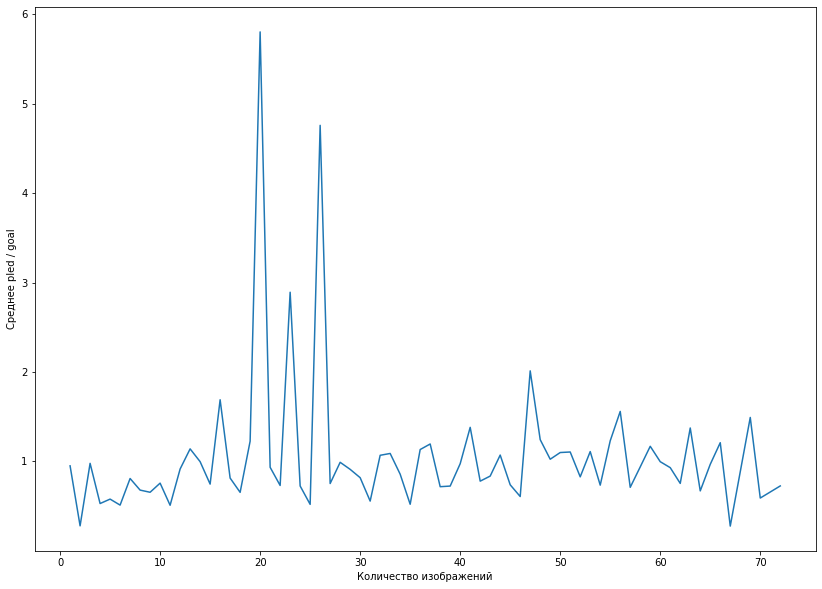

In [17]:
n_imgs = sorted(n_imgs, key=lambda x: x[0], reverse=True)

xs = [k for k, v in n_imgs]
ys = [v for k, v in n_imgs]

plt.figure(figsize=(14,10))
plt.plot(xs, ys)
plt.xlabel('Количество изображений')
plt.ylabel('Среднее pled / goal')

None

In [18]:
new_xs = []
new_ys = []

for i in range(1, len(n_imgs)):
    new_xs.append(n_imgs[i][0])
    new_ys.append(n_imgs[i][1] - n_imgs[i - 1][1])

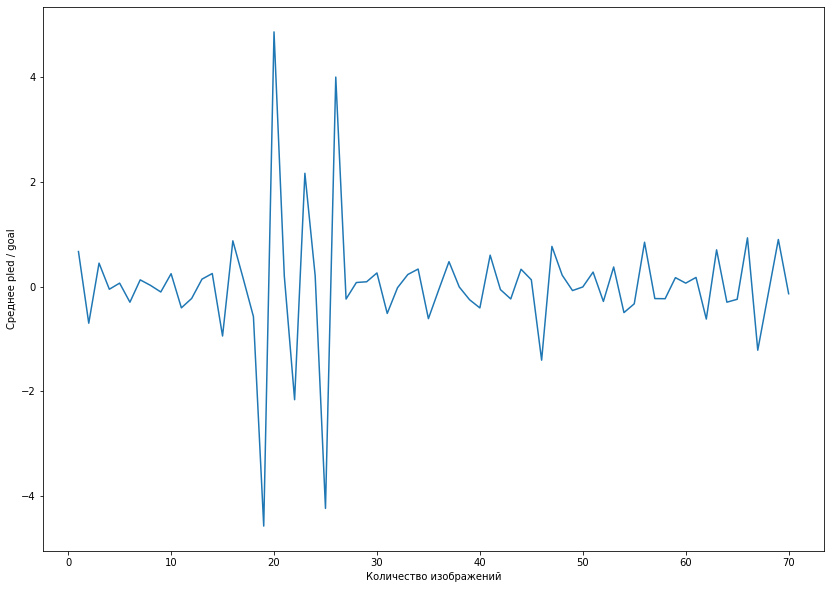

In [19]:
# График тенеденции
plt.figure(figsize=(14,10))
plt.plot(new_xs, new_ys)

plt.xlabel('Количество изображений')
plt.ylabel('Среднее pled / goal')
None

<AxesSubplot:>

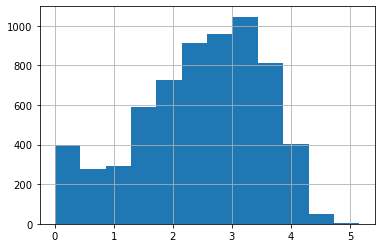

In [20]:
# hist for np.log(n_images)
np.log(df['n_img']).hist(bins=12)

<AxesSubplot:>

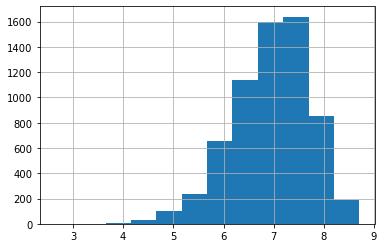

In [21]:
df  = df[df['text_am'] > 10]
np.log(df['text_am']).hist(bins=12)

In [22]:
df['text_am'].max()

6042

In [23]:
n_texts = []
n = 200
for v in range(1, df['text_am'].max(), n):
    s = df[(df['text_am'] >= v) & (df['text_am'] < v + n)]['success_rate']
    if s.shape[0] > 5: 
        n_texts.append((f'{int((v +v + n) / 2)}', v, s.sum() / s.shape[0]))

In [24]:
n_texts = sorted(n_texts, key=lambda x: x[1])
n_texts = sorted(n_texts, key=lambda x: x[2], reverse=True)
n_texts

[('4301', 4201, 2.1928545758957907),
 ('901', 801, 1.566586745814526),
 ('3701', 3601, 1.5290253196366719),
 ('1501', 1401, 1.5013720904083894),
 ('701', 601, 1.4608580720688358),
 ('4501', 4401, 1.3801903055855704),
 ('3901', 3801, 1.2542145967607683),
 ('2901', 2801, 1.2171525920199102),
 ('3101', 3001, 1.1537874335505767),
 ('3301', 3201, 1.1372217168998195),
 ('3501', 3401, 1.0573338232940714),
 ('2101', 2001, 0.9955194613209789),
 ('2701', 2601, 0.9883652364768827),
 ('1701', 1601, 0.9423266728106627),
 ('4701', 4601, 0.9270848622139823),
 ('1101', 1001, 0.8747405526846085),
 ('2301', 2201, 0.853852011084352),
 ('4101', 4001, 0.8515540109531663),
 ('1901', 1801, 0.8371242619957764),
 ('501', 401, 0.8086905792767187),
 ('2501', 2401, 0.7962983884461223),
 ('1301', 1201, 0.7704737299627201),
 ('301', 201, 0.5238559552236309),
 ('101', 1, 0.35583220958640854)]

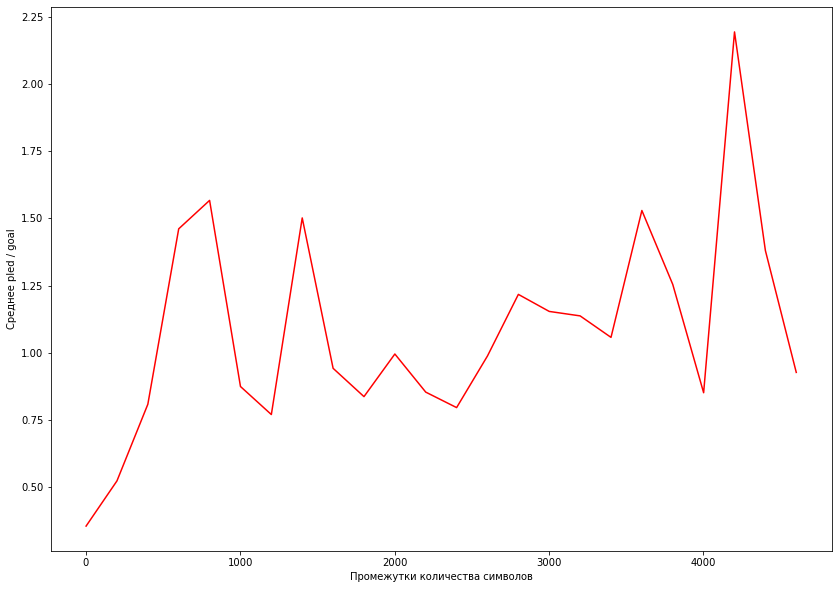

In [25]:
# On "TypeError: 'str' object is not callable" restart Kernel
n_texts = sorted(n_texts, key=lambda x: x[1])

xs = [k for title, k, v in n_texts]
ys = [v for title, k, v in n_texts]

plt.figure(figsize=(14,10))
plt.plot(xs, ys, c='r')
plt.xlabel('Промежутки количества символов')
plt.ylabel('Среднее pled / goal')

None

In [26]:
new_xs = []
new_ys = []

for i in range(1, len(n_texts)):
    new_xs.append(n_texts[i][1])
    new_ys.append(n_texts[i][2] - n_texts[i - 1][2])

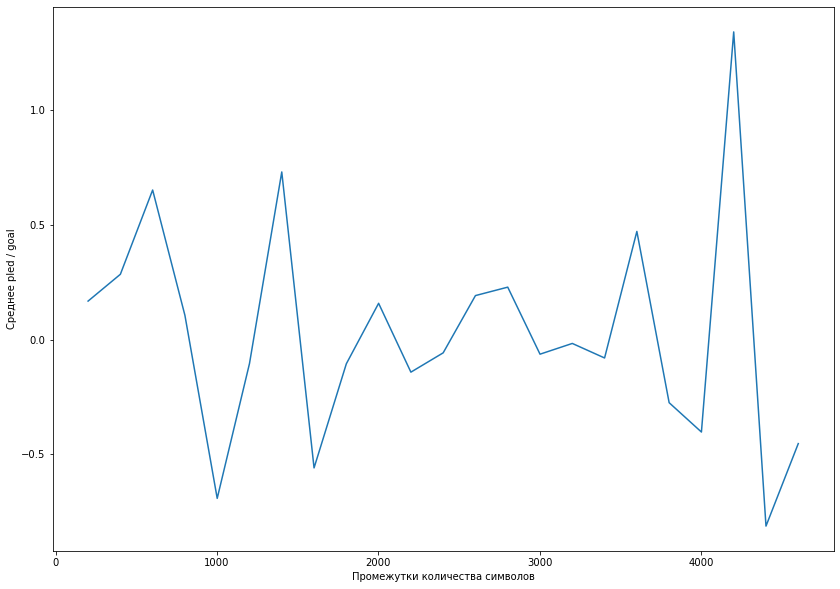

In [27]:
plt.figure(figsize=(14,10))
plt.plot(new_xs, new_ys)

plt.xlabel('Промежутки количества символов')
plt.ylabel('Среднее pled / goal')
None

In [28]:
def get_y(x, coeffs):
    y = 0
    for i in range(len(coeffs)):
        y += x**i * coeffs[-1 - i]
    return y

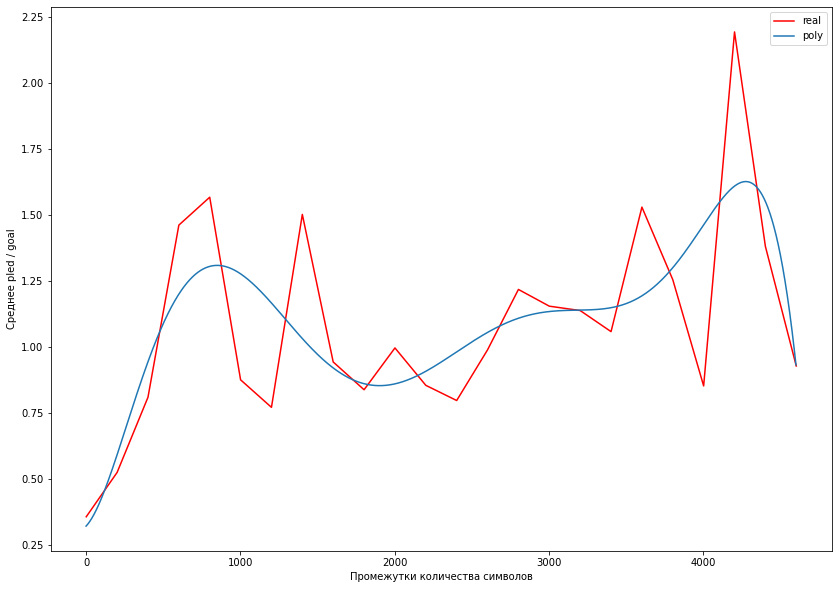

In [29]:
poly = np.polyfit(xs, ys, 7)

poly_xs = [i for i in range(4600)]
poly_ys= [get_y(i, poly) for i in range(4600)]

plt.figure(figsize=(14,10))

plt.plot(xs, ys, c='r', label='real')
plt.plot(poly_xs, poly_ys, label='poly')

plt.xlabel('Промежутки количества символов')
plt.ylabel('Среднее pled / goal')

plt.legend()
None

In [59]:
def explore_feature(df, col_name, fig=None):
    fig = plt if fig is None else fig
    
    data = df[col_name].apply(lambda x: x if x != 0 else 10e-10)
    target = df['success_rate'].apply(lambda x: x if x != 0 else 10e-10)
    
    figsize = (10, 7)
    fig.figure(figsize=figsize)
    fig.title('Распределение')
    fig.hist(np.log(data))
    
    fig.figure(figsize=figsize)
    fig.title('Boxplot')
    fig.boxplot(data)
    
    fig.figure(figsize=figsize)
    fig.scatter(data, np.log(target))
    fig.xlabel(f'Признак "{col_name}"')
    fig.ylabel('Средний np.log(pled / goal)')
    
    fig.figure(figsize=(10, 7))
    fig.scatter(data, np.log(target))
    fig.xlabel(f'Признак "{col_name}"')
    fig.ylabel('Средний np.log(pled / goal)')
    
    step = int(data.max() - data.min()) // 25 + 1
    xs, ys = [], []
    
    for v in range(0, int(data.max() + 1), step):
        rng = target[(data >= v) & (data < v + step)]
        if rng.shape[0] > 5:
            xs.append((2 * v + step) // 2)
            ys.append(rng.mean())
            
    fig.figure(figsize=figsize)
    fig.plot(xs, ys)
    fig.xlabel(f'промежутки "{col_name}" с шагом {step}')
    fig.ylabel('Среднее pled / goal')

In [62]:
genres = ['rpg', 'platformer', 'shooter', 'shooter', 'fighting',
          'survival', 'horror', 'strategy', 'arcade', 'simulator',
          'mmo', 'indie', 'action', 'quest', 'adventure']
data = df.drop(columns=['is_site', 'succsess', 'pled', 'goal']).drop(columns=genres)
numeric_data = data.corr().columns[1:]
print(numeric_data)

Index(['period', 'text_am', 'n_img', 'n_vid', 'n_pled_t', 'min_pled_t',
       'max_pled_t', 'mean_pled_t', 'step_pled_t', 'cr_time', 'backed',
       'created', 'mgp', 'cont', 'success_rate'],
      dtype='object')


C:\Users\belol\AppData\Local\Temp/ipykernel_18076/4003407671.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig.figure(figsize=figsize)


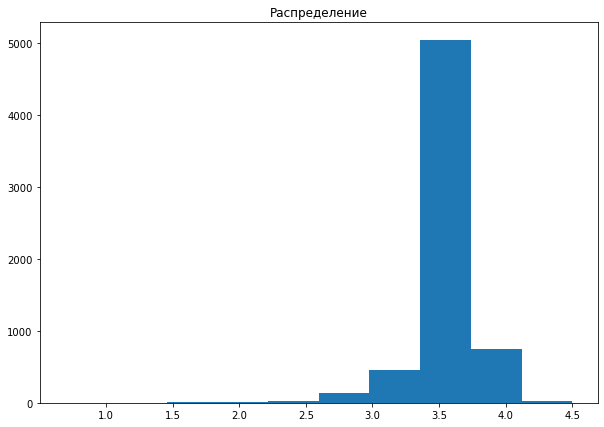

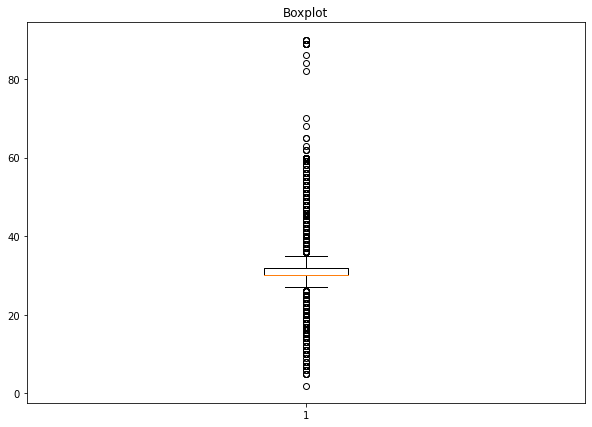

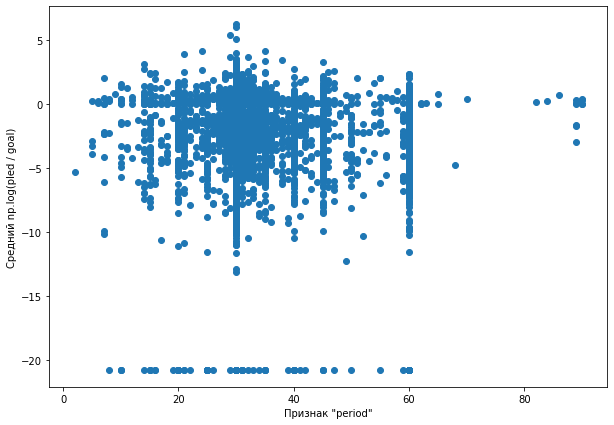

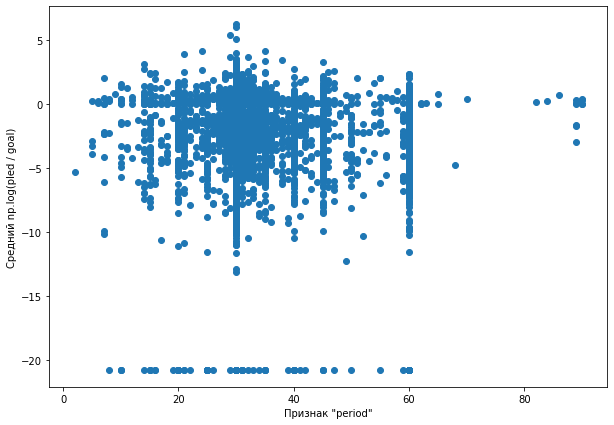

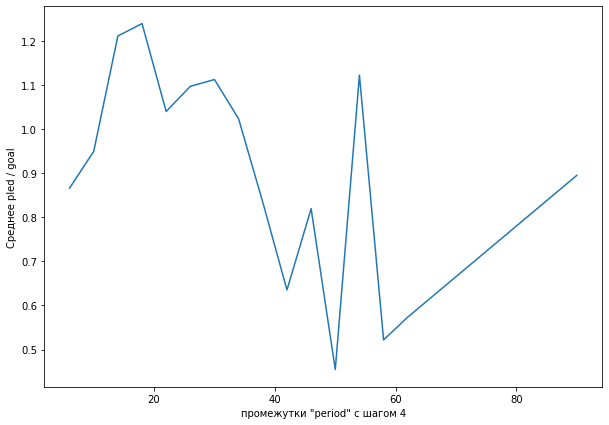

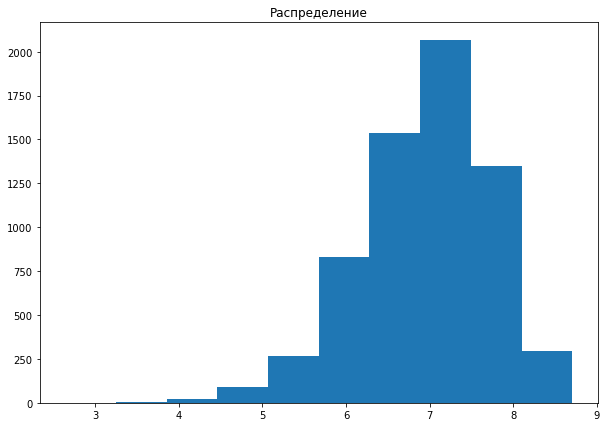

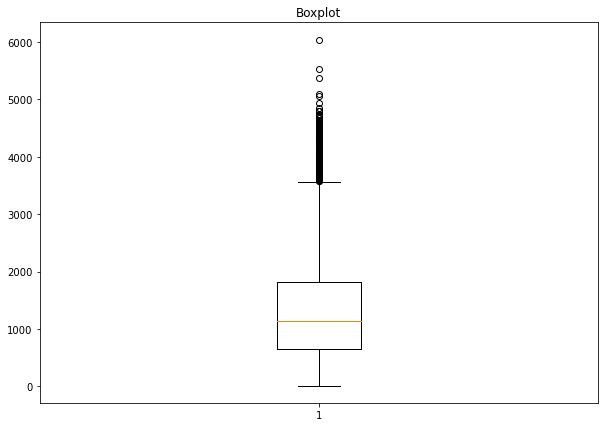

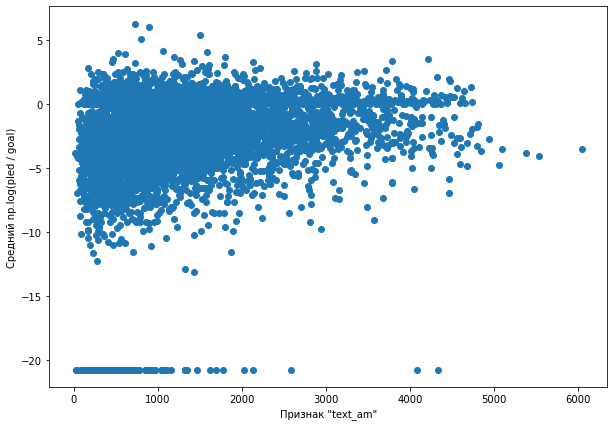

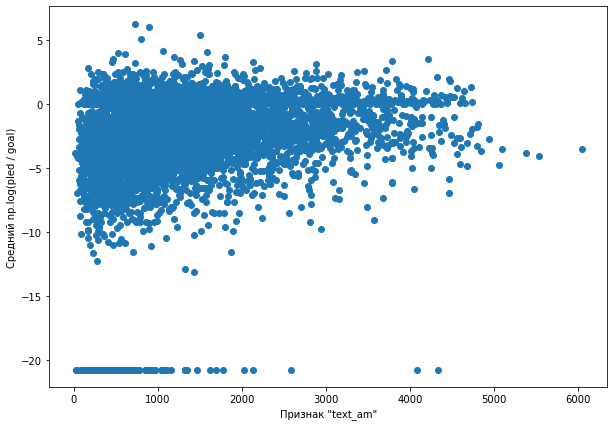

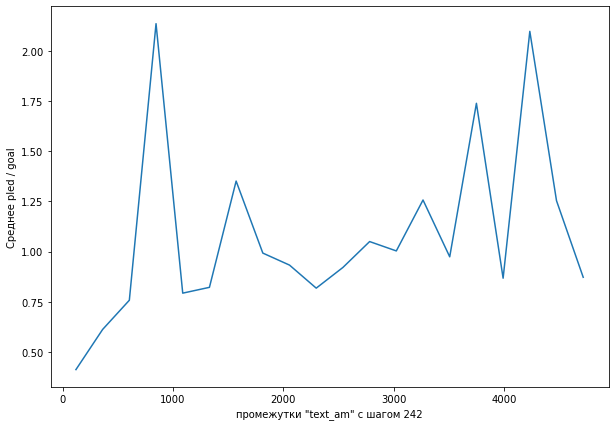

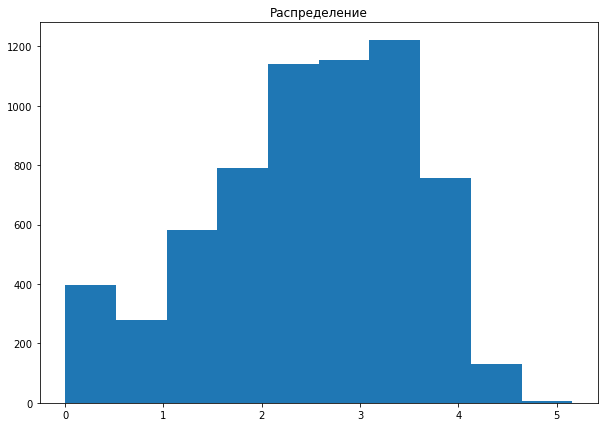

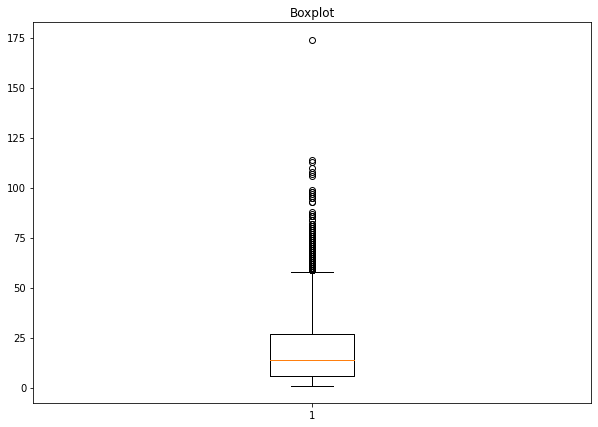

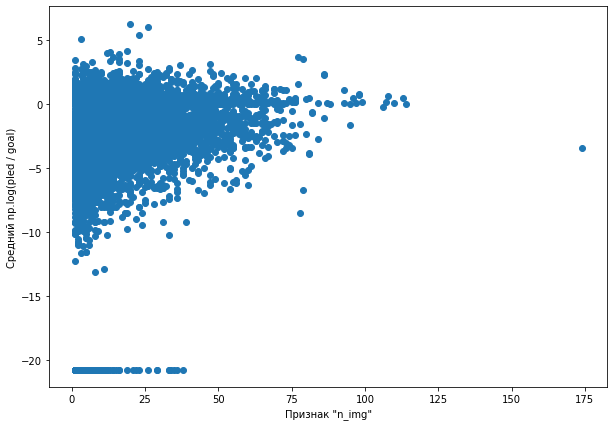

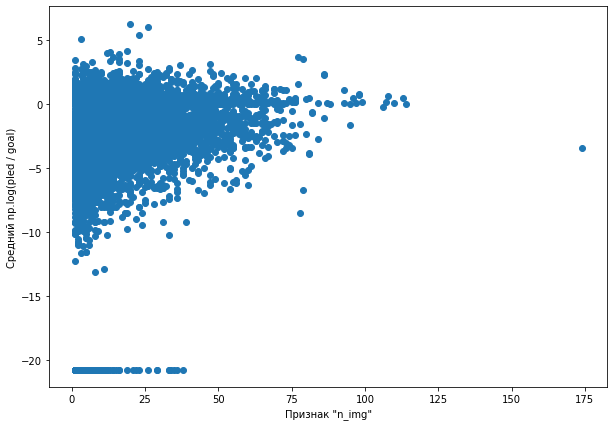

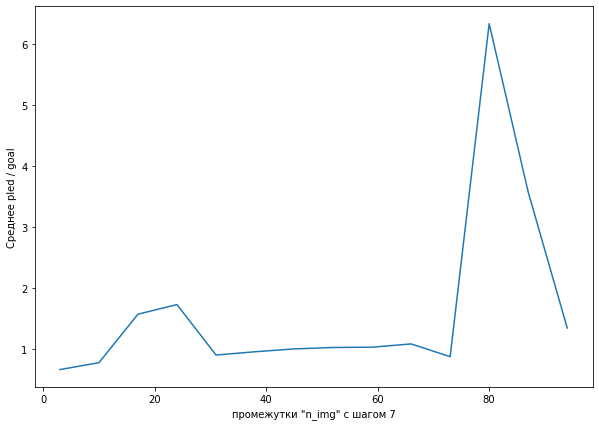

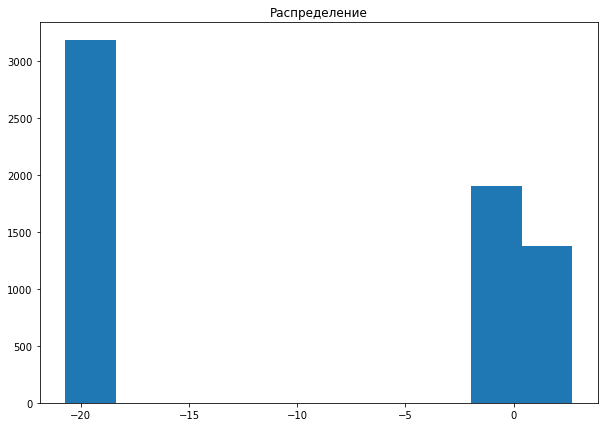

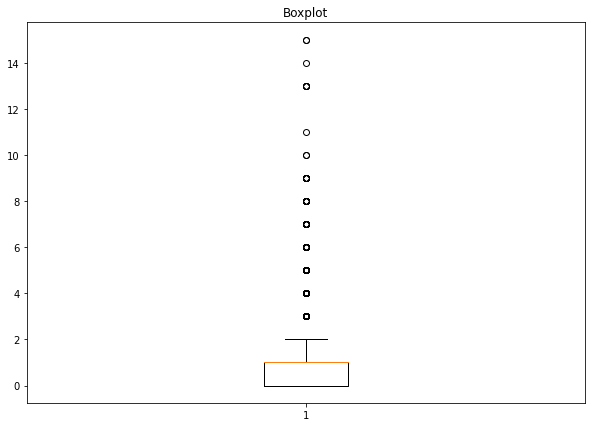

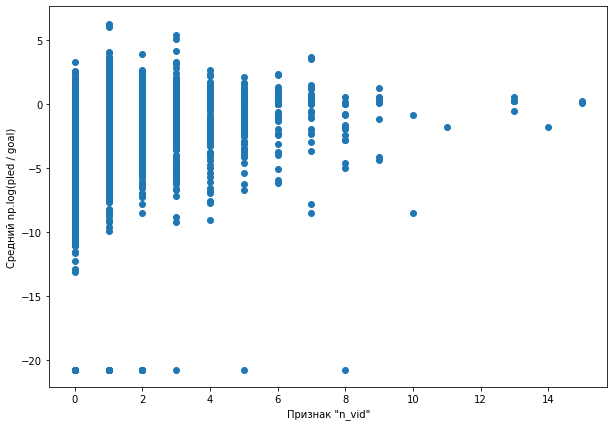

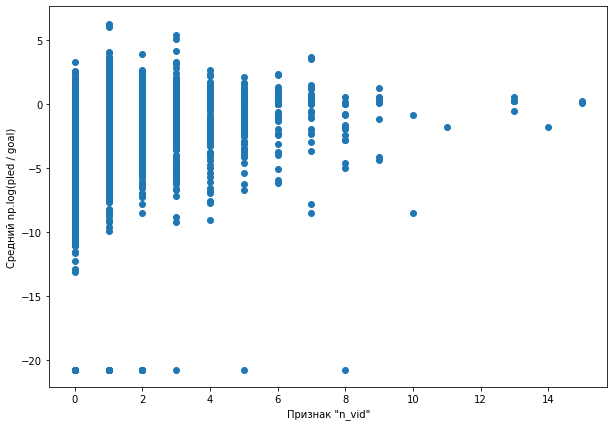

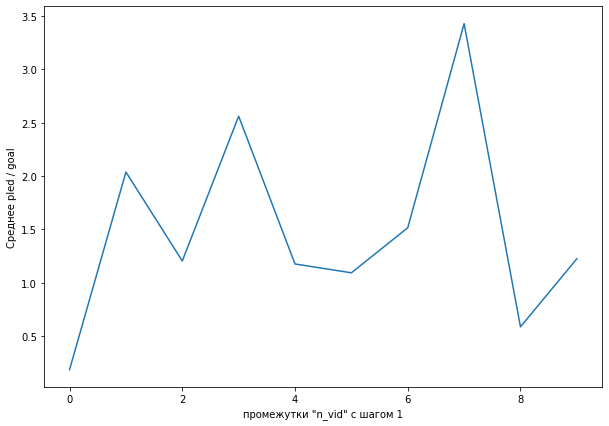

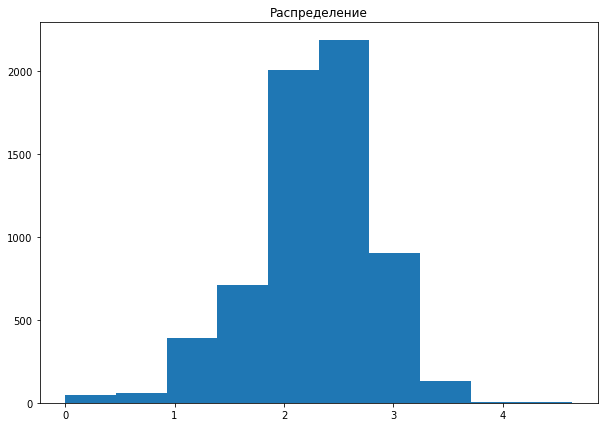

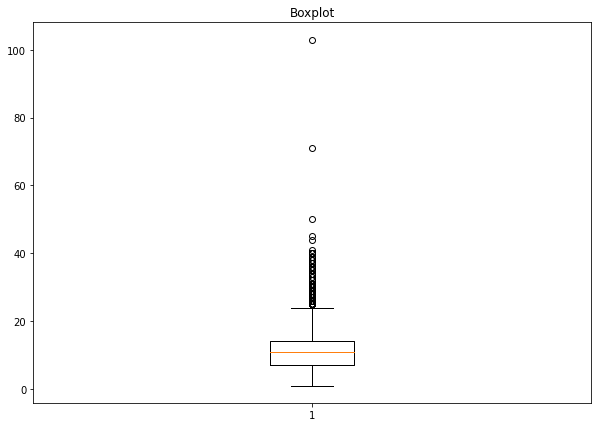

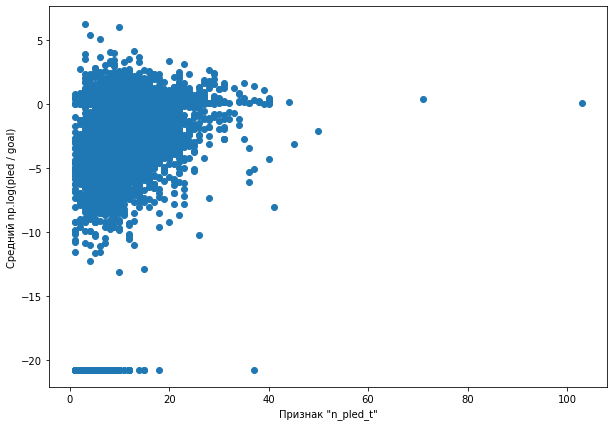

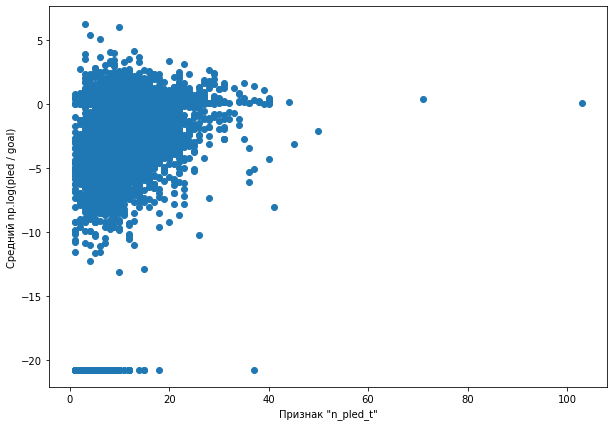

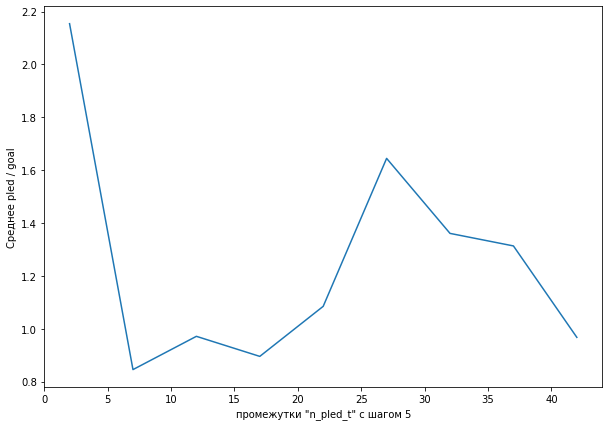

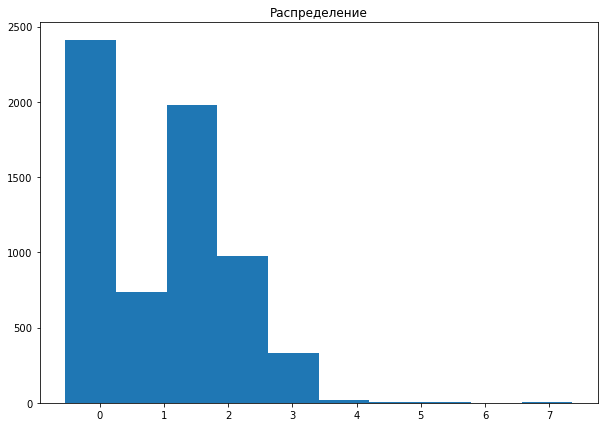

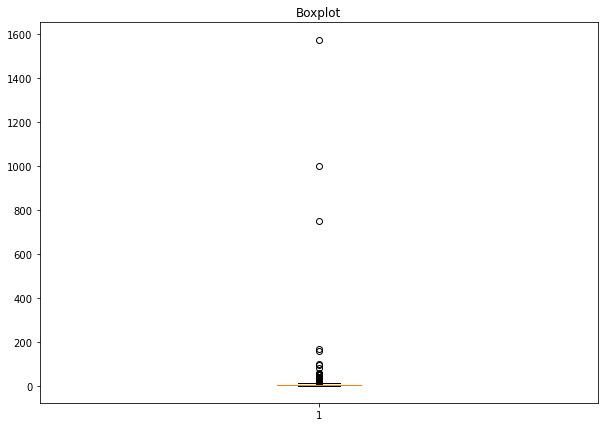

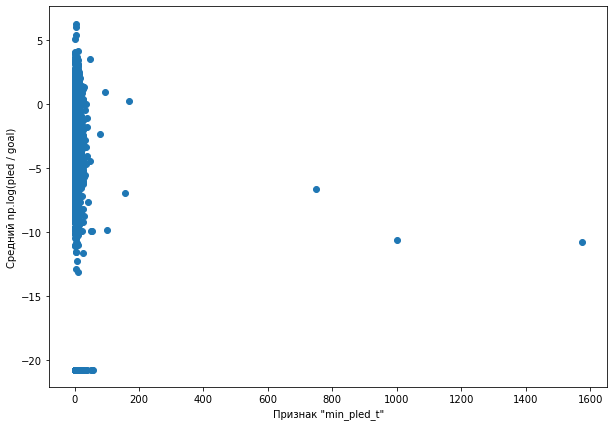

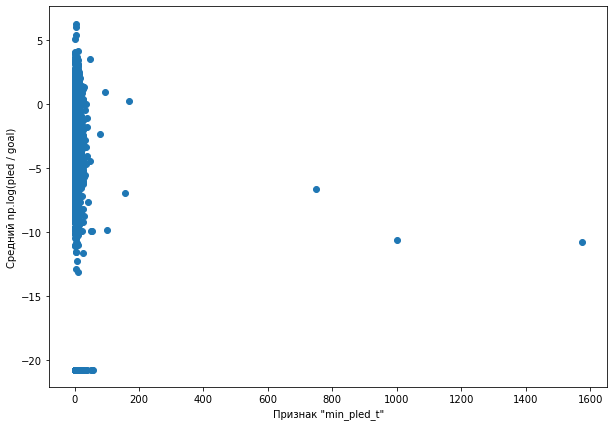

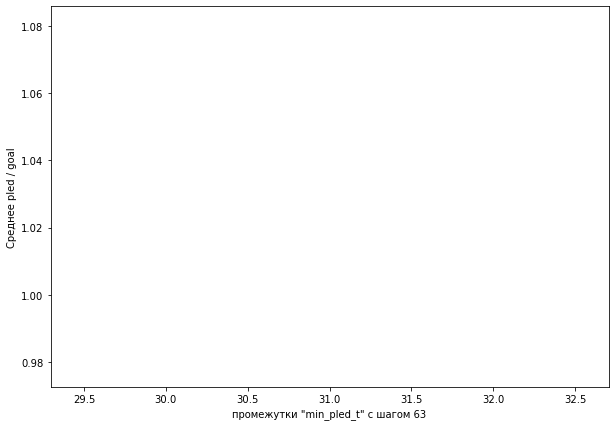

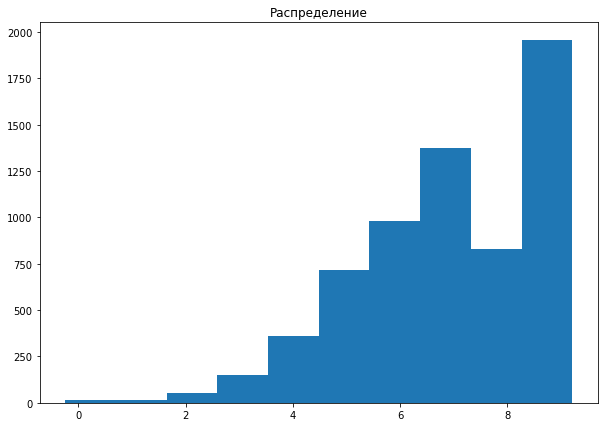

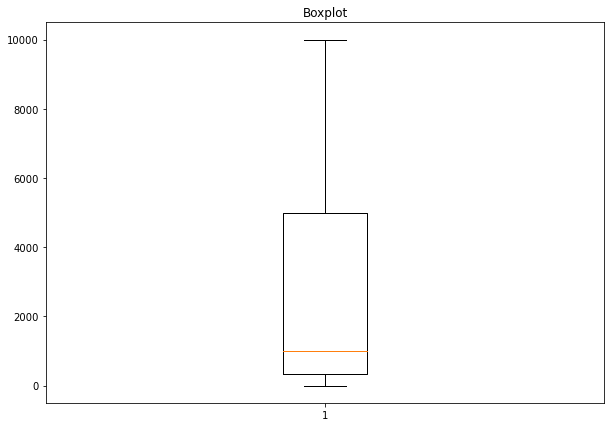

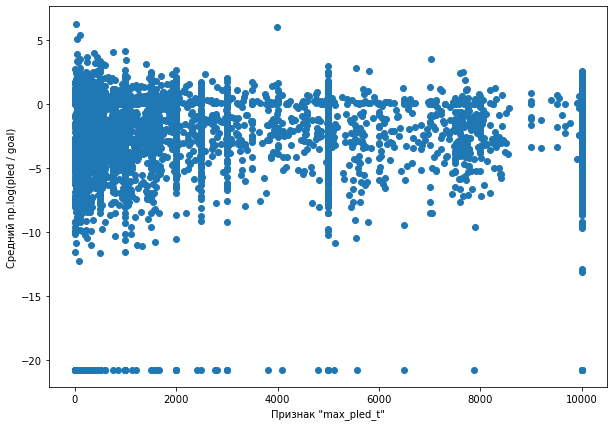

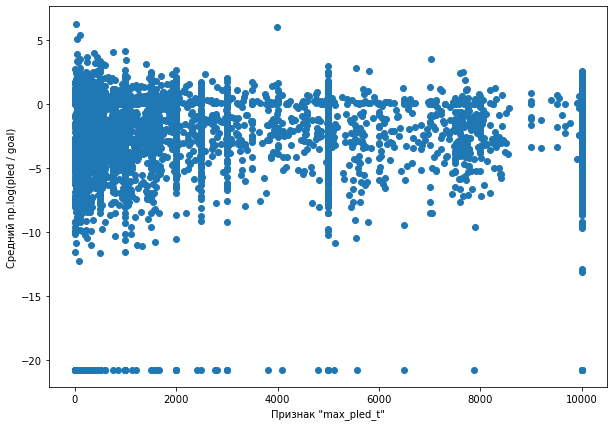

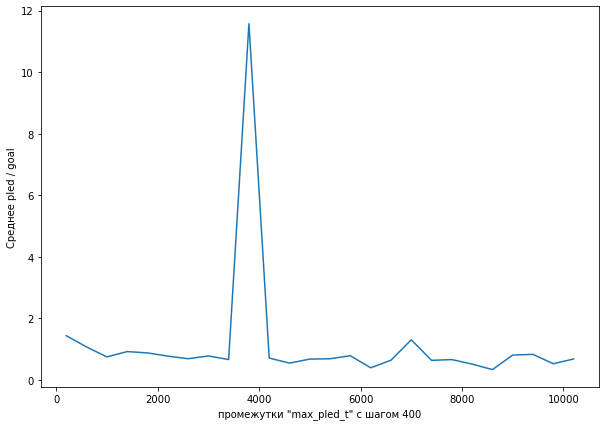

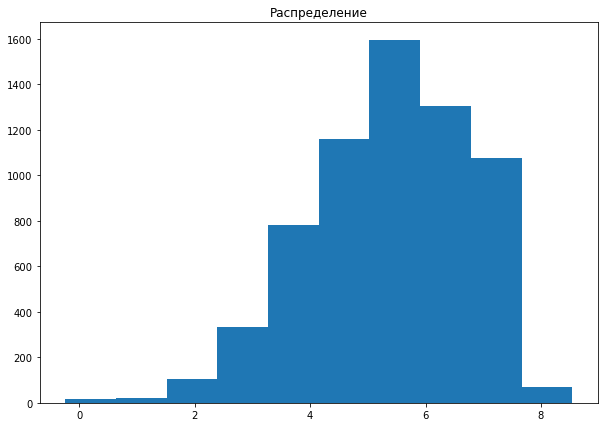

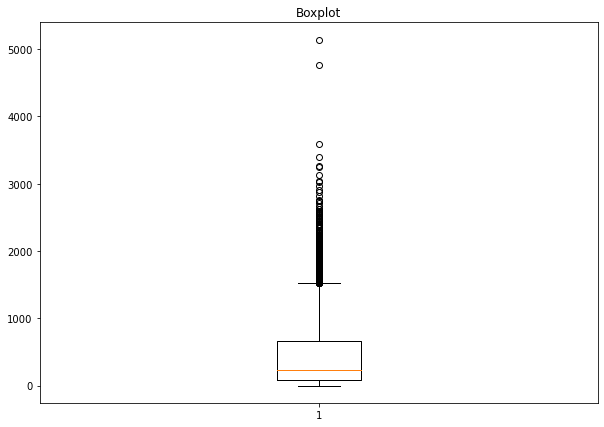

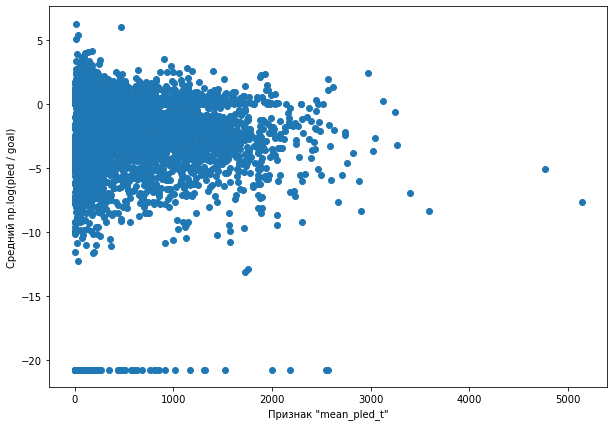

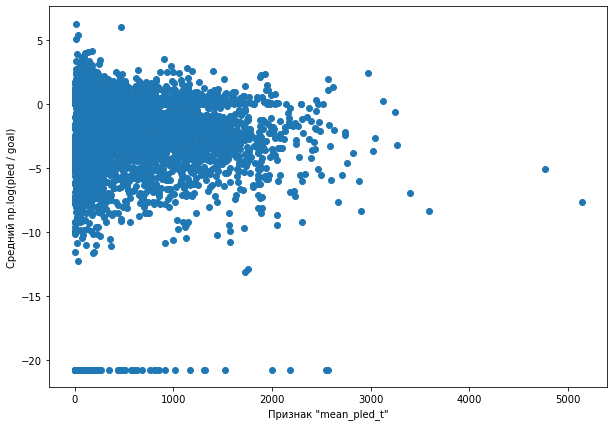

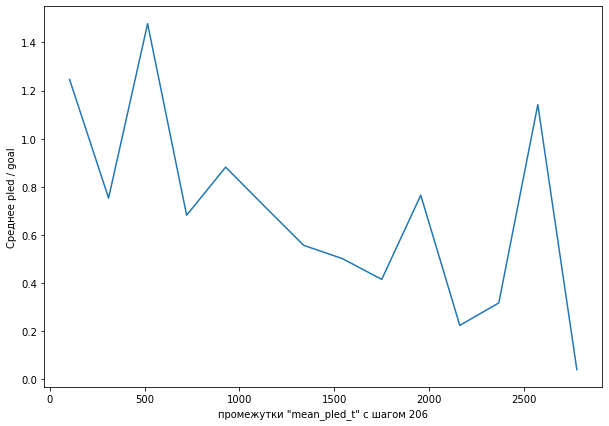

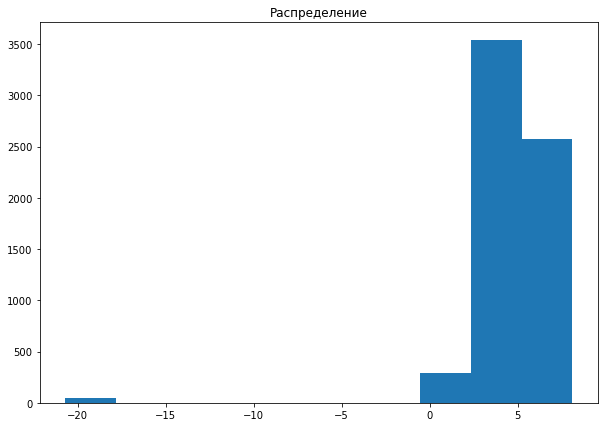

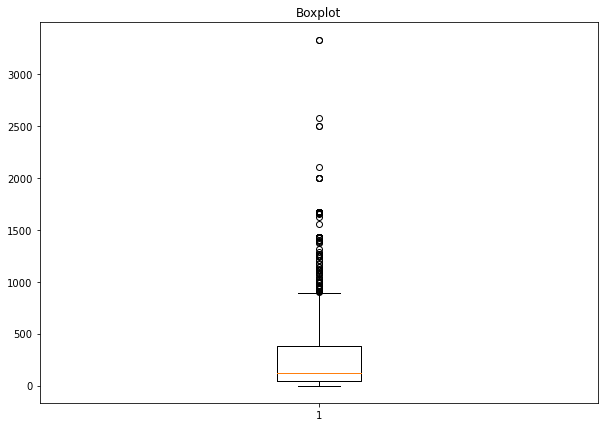

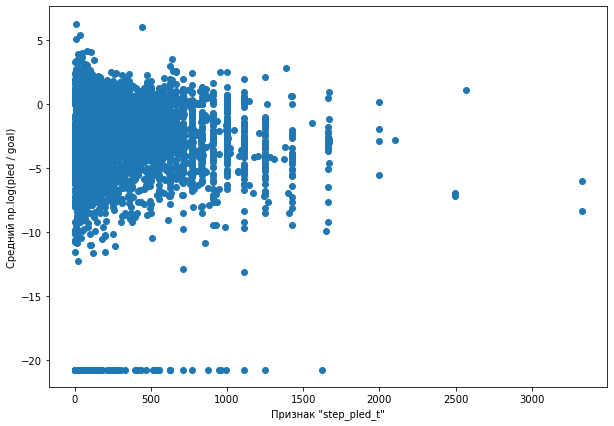

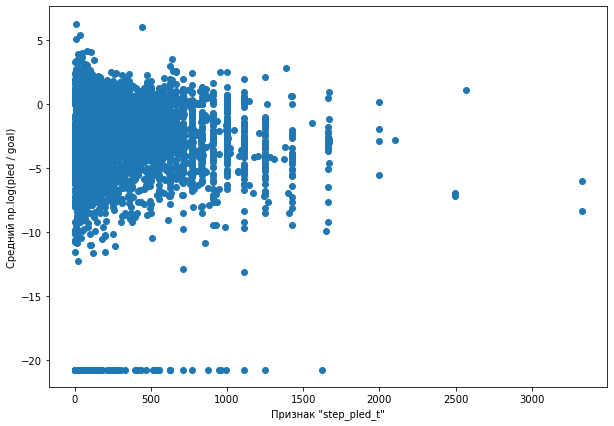

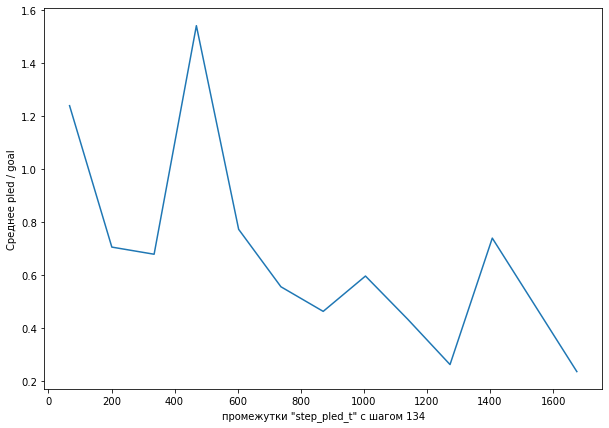

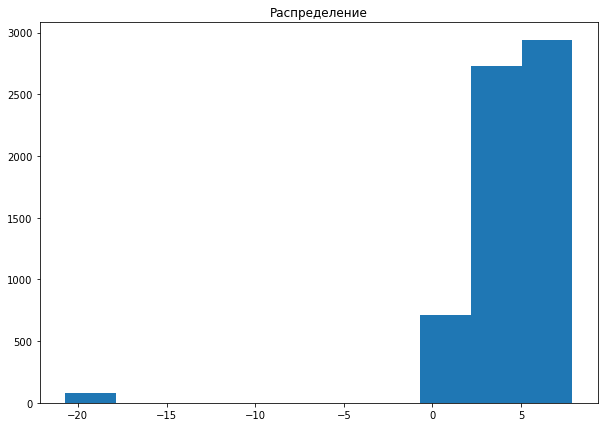

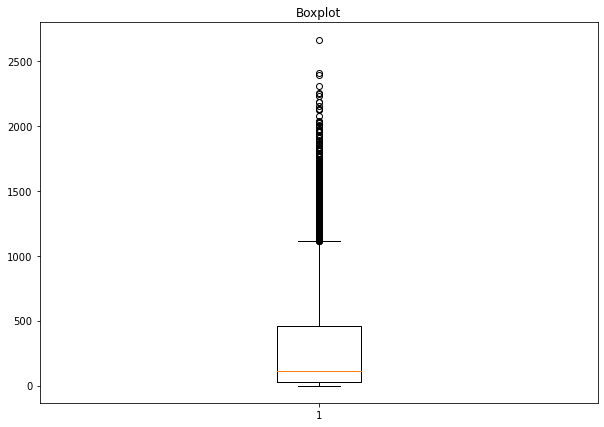

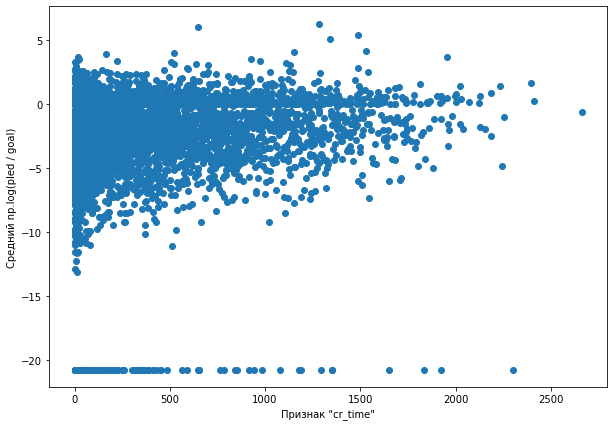

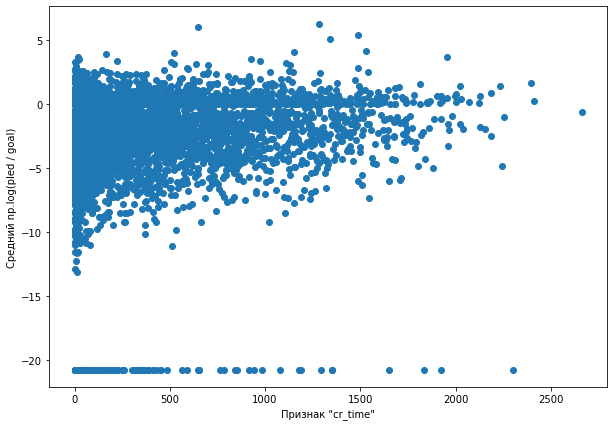

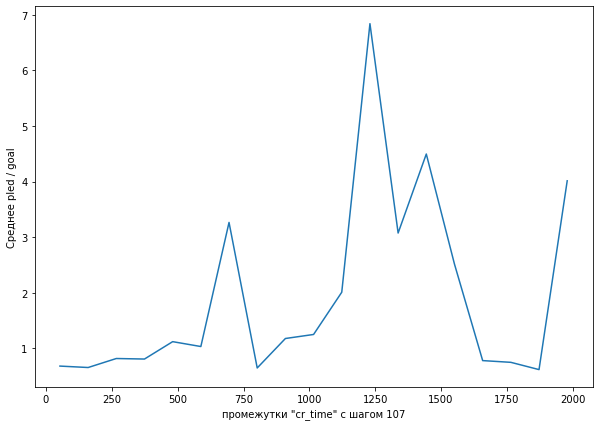

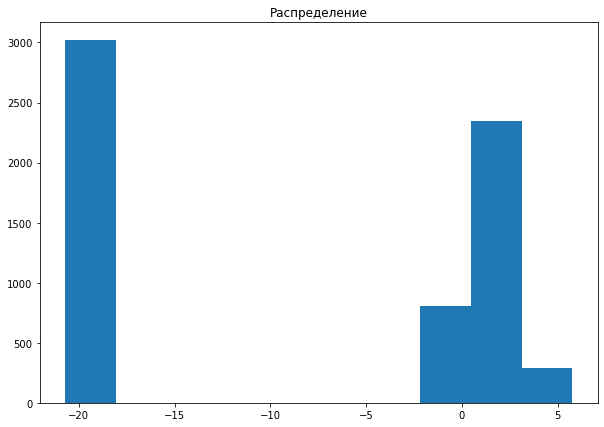

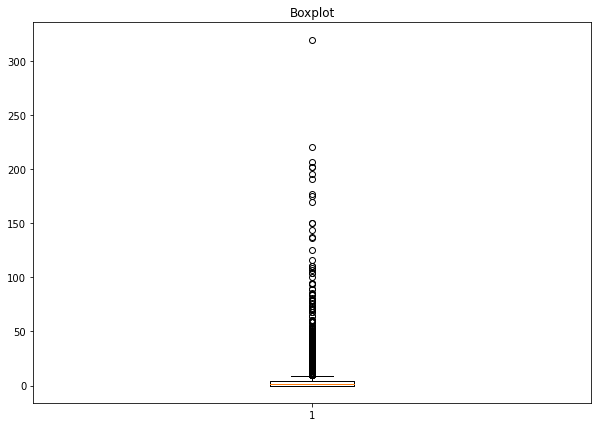

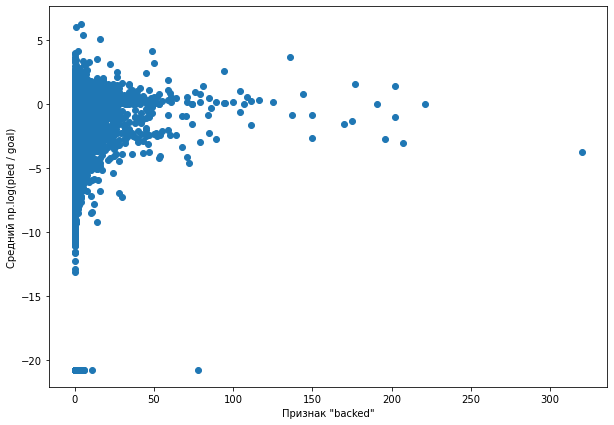

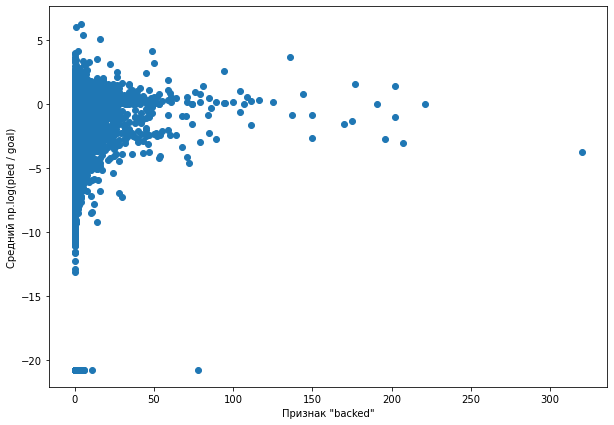

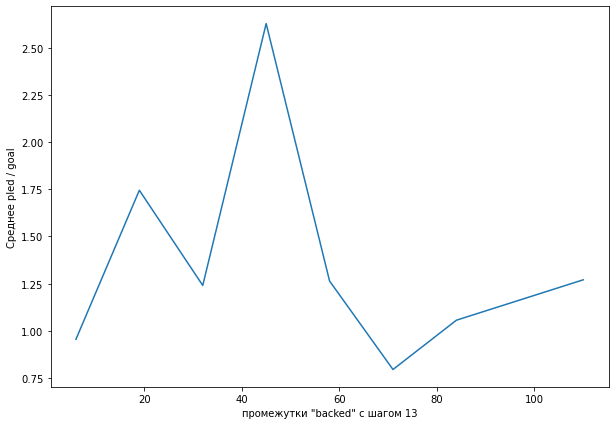

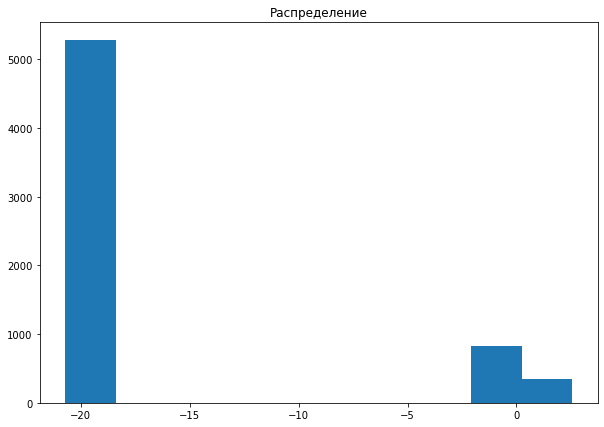

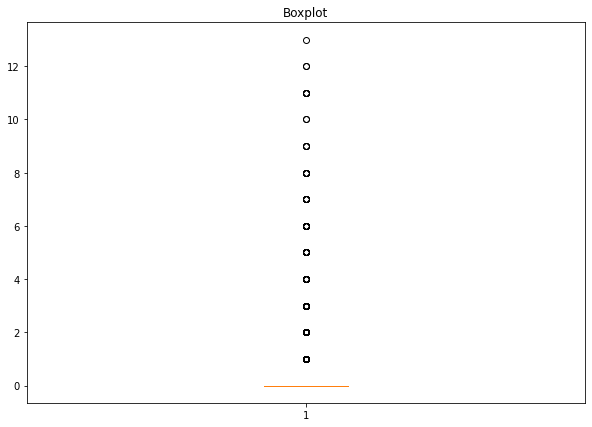

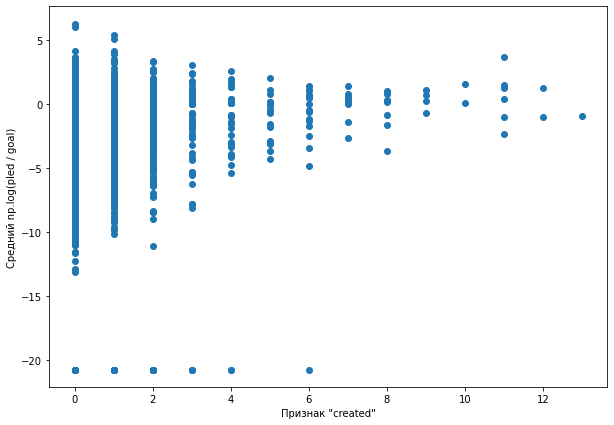

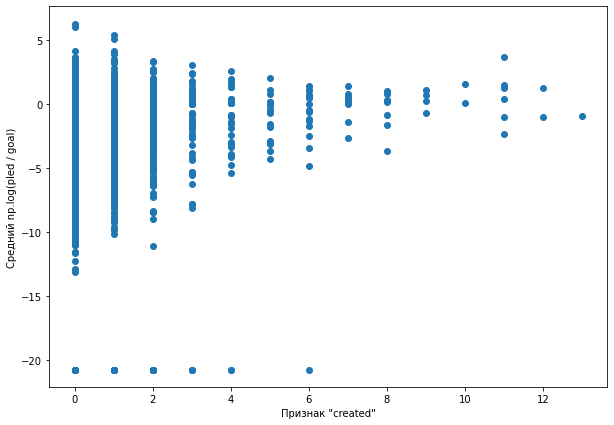

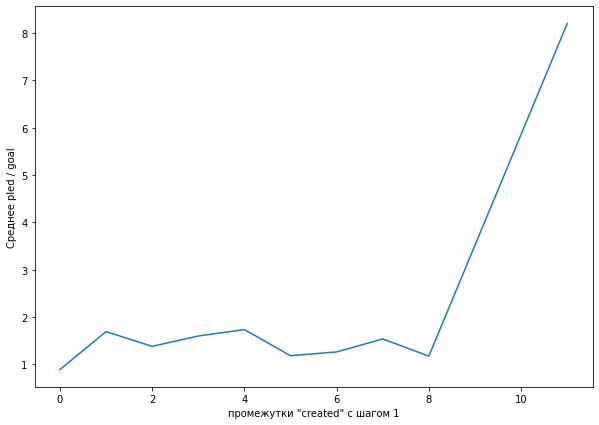

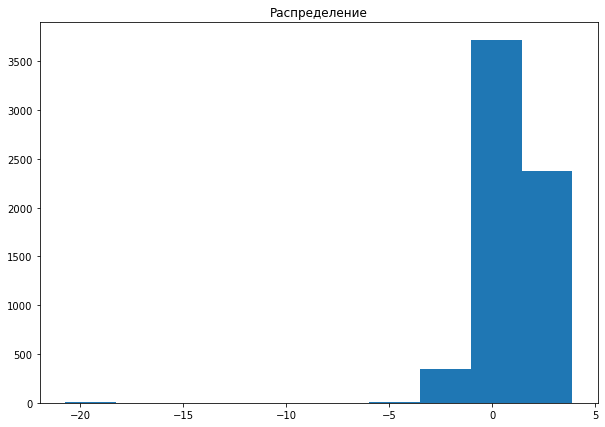

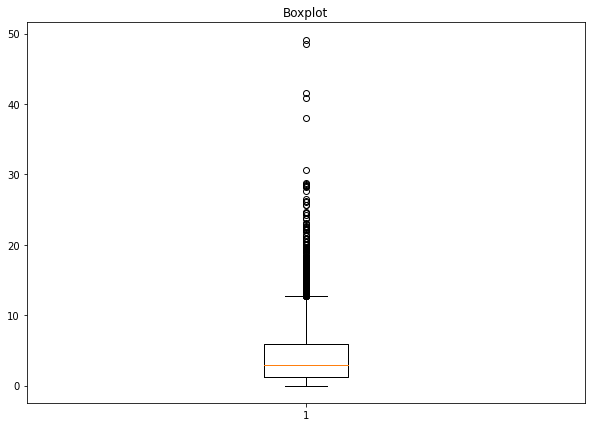

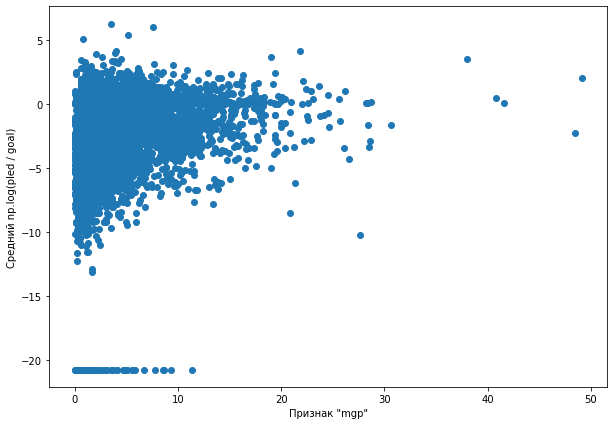

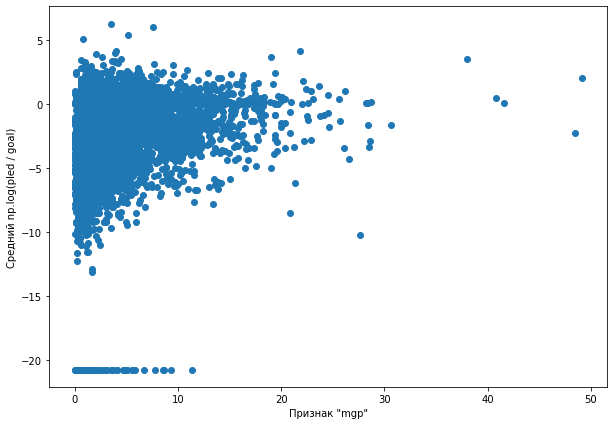

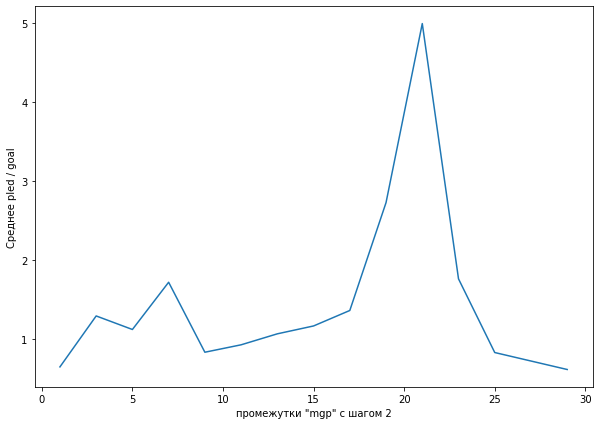

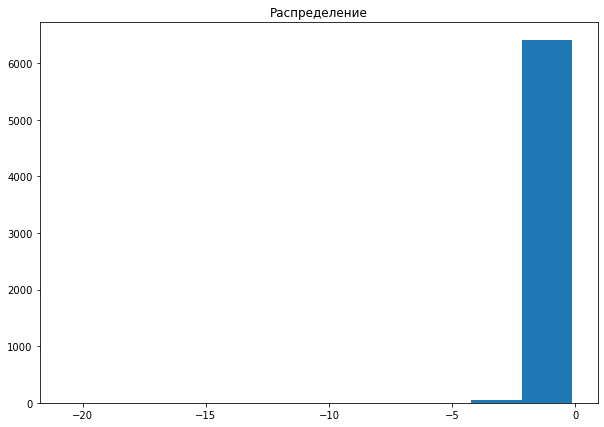

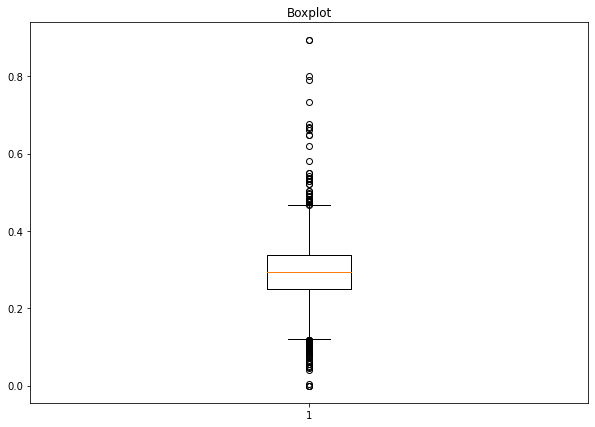

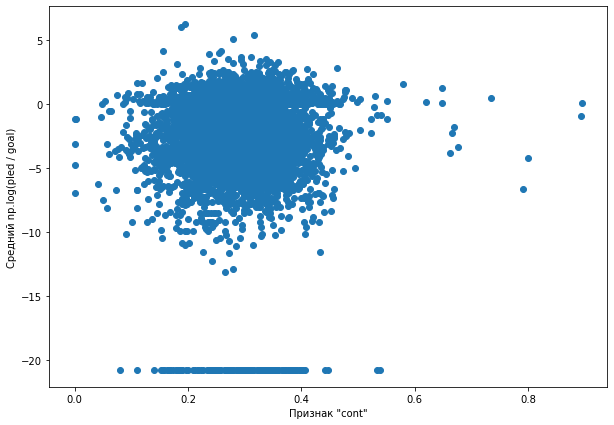

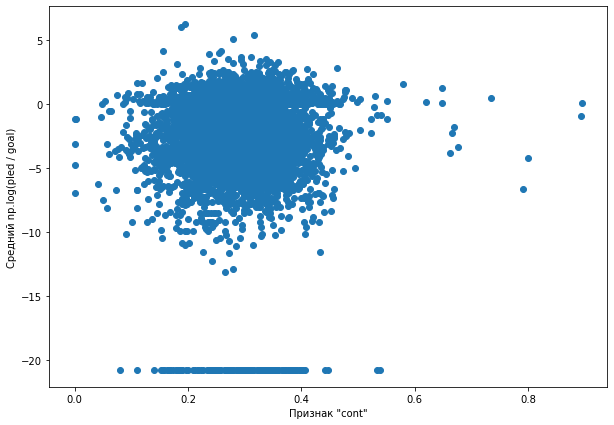

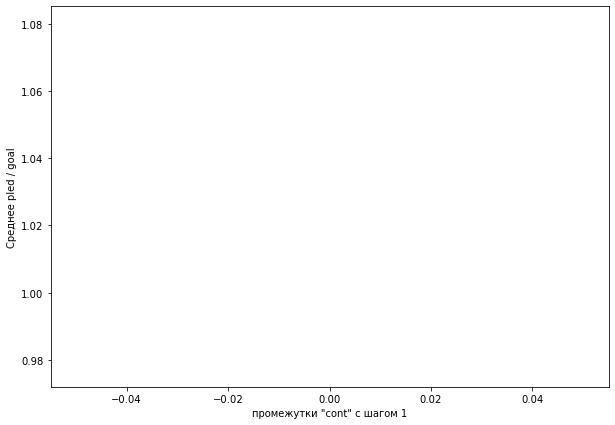

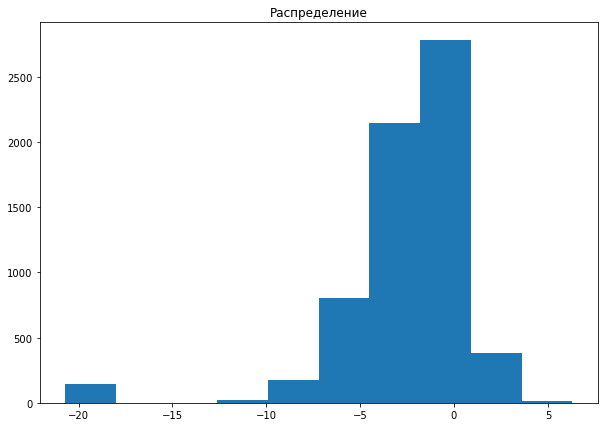

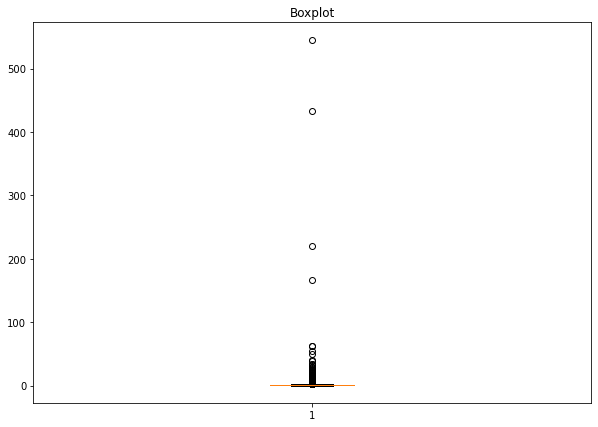

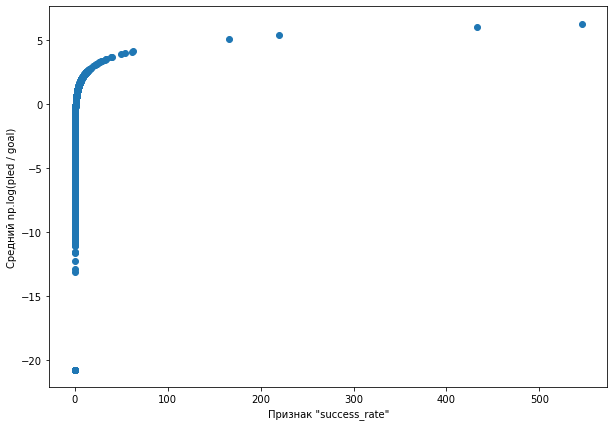

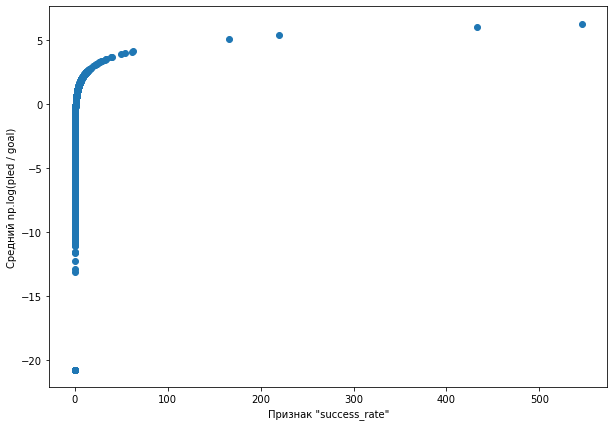

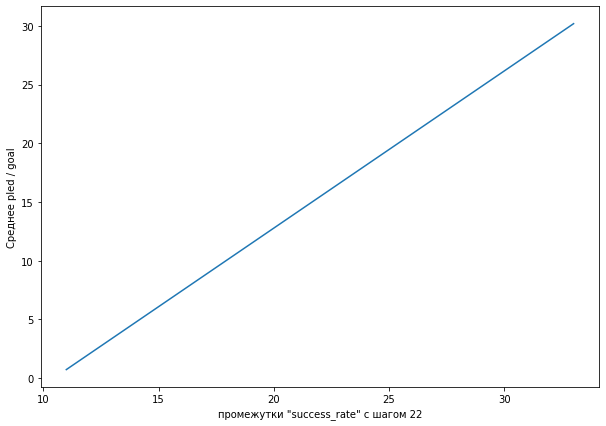

In [63]:
for col in numeric_data:
    explore_feature(df, col)